# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
boston = pd.read_csv ('boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [2]:
boston.shape

(404, 14)

In [3]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [7]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
print("Quantile 1:", Q1)
print("Quantile 3:", Q3)
print("Interquantile range:", IQR)

Quantile 1: crim         0.082382
zn           0.000000
indus        5.190000
chas         0.000000
nox          0.453000
rm           5.902750
age         45.800000
dis          2.087875
rad          4.000000
tax        281.000000
ptratio     17.375000
black      374.710000
lstat        7.135000
medv        17.100000
Name: 0.25, dtype: float64
Quantile 3: crim         4.053158
zn          12.500000
indus       18.100000
chas         0.000000
nox          0.631000
rm           6.629250
age         94.150000
dis          5.222125
rad         24.000000
tax        666.000000
ptratio     20.200000
black      396.007500
lstat       16.910000
medv        25.000000
Name: 0.75, dtype: float64
Interquantile range: crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000

In [8]:
print(boston < (Q1 - 1.5 * IQR)) or (boston > (Q3 + 1.5 * IQR))

      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
399  False  False  False  False  False  False  False  False  False  False   
400  False  False  False  False  False  False  False  False  False  False   
401  False  False  False  False  False  False  False  False  False  False   
402  False  False  False  False  False  False  False  False  False  False   
403  False  False  False  False  False  False  False  False  False  False   

     ptratio  black  lstat   medv  
0      False  False  False  False  
1  

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,False,False,False,False,False,False,False,False,False,False,False,False,False,False
400,True,False,False,False,False,False,False,False,False,False,False,False,False,False
401,False,True,False,True,False,True,False,False,False,False,False,False,False,True
402,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
from scipy import stats
z = np.abs(stats.zscore(boston))
print(z)

[[0.50092737 0.47948153 0.03366916 ... 0.06725647 0.41370727 0.01174067]
 [0.51265867 1.14682416 0.88510206 ... 0.42609576 0.51565914 0.30705366]
 [0.46061638 0.47948153 0.17007831 ... 0.41423033 0.39980474 0.208616  ]
 ...
 [0.39242137 0.47948153 0.43390259 ... 0.06617779 0.3478423  0.72892936]
 [1.43814673 0.47948153 1.05910299 ... 0.42609576 0.8606911  1.08049244]
 [0.5170653  1.47208529 0.91508209 ... 0.11166193 0.95745057 0.26950979]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [10]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  20,  28,  29,  34,  36,  37,  38,  47,  53,  56,  57,
        62,  67,  70,  71,  71,  79,  88,  89,  91,  98, 101, 106, 111,
       111, 112, 114, 116, 136, 141, 148, 148, 150, 158, 160, 160, 161,
       165, 166, 170, 170, 177, 184, 192, 196, 198, 200, 200, 202, 205,
       212, 214, 218, 223, 226, 232, 234, 238, 241, 246, 250, 251, 251,
       252, 252, 254, 258, 258, 264, 272, 272, 272, 273, 273, 285, 285,
       297, 303, 304, 312, 314, 314, 321, 333, 337, 341, 347, 352, 355,
       369, 380, 382, 382, 400, 400, 401, 401, 401, 402], dtype=int64), array([ 3, 11, 11,  1,  7,  0, 13,  3, 11,  3,  1,  3,  1, 11,  3,  1,  3,
       13,  3, 13,  5, 11,  3,  1,  1,  1,  7,  1,  0,  0,  3, 11,  3,  5,
        3,  3,  1, 13,  7,  3,  3, 11, 12,  5, 11,  1, 11,  3,  5, 13,  3,
        3,  1, 11,  3, 11, 13,  1,  5,  3, 11, 11,  3,  1,  7,  1,  7,  3,
       11, 12,  3,  3,  5, 13,  0, 11,  0, 11,  3,  5, 11, 11,  1, 13,  1,
       11,  1,  3, 13, 13, 11,  3,  0,  3, 13,  

In [11]:
boston = boston[(z < 3).all(axis=1)]

In [12]:
boston.shape

(321, 14)

In [13]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [14]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.245049,0.523523,NaN,0.562803,-0.199660,0.436390,-0.485358,0.811224,0.749920,0.344787,-0.327797,0.563541,-0.504009
zn,-0.245049,1.000000,-0.467428,NaN,-0.444377,0.295135,-0.453536,0.559321,-0.245867,-0.265426,-0.350184,0.148885,-0.365562,0.342641
indus,0.523523,-0.467428,1.000000,NaN,0.721443,-0.362448,0.562405,-0.659449,0.569357,0.705728,0.327299,-0.324725,0.613879,-0.565210
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,0.562803,-0.444377,0.721443,NaN,1.000000,-0.274451,0.705628,-0.762902,0.581103,0.642956,0.119749,-0.349625,0.589708,-0.467456
rm,-0.199660,0.295135,-0.362448,NaN,-0.274451,1.000000,-0.194372,0.190069,-0.111475,-0.206632,-0.232715,0.107586,-0.613583,0.712762
age,0.436390,-0.453536,0.562405,NaN,0.705628,-0.194372,1.000000,-0.695878,0.402581,0.466754,0.195327,-0.234018,0.605873,-0.454210
dis,-0.485358,0.559321,-0.659449,NaN,-0.762902,0.190069,-0.695878,1.000000,-0.454150,-0.518759,-0.182534,0.265998,-0.495526,0.314168
rad,0.811224,-0.245867,0.569357,NaN,0.581103,-0.111475,0.402581,-0.454150,1.000000,0.902493,0.424147,-0.321713,0.456052,-0.425741
tax,0.749920,-0.265426,0.705728,NaN,0.642956,-0.206632,0.466754,-0.518759,0.902493,1.000000,0.422950,-0.340601,0.529352,-0.535400


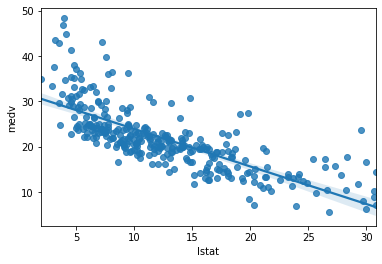

In [17]:
import seaborn as sns
sns.regplot(x='lstat', y='medv', data=boston)

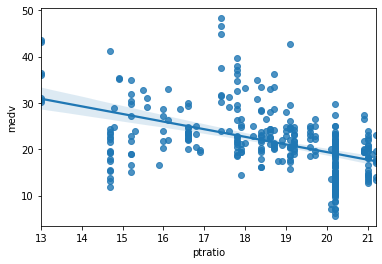

In [18]:
sns.regplot(x='ptratio', y='medv', data=boston)

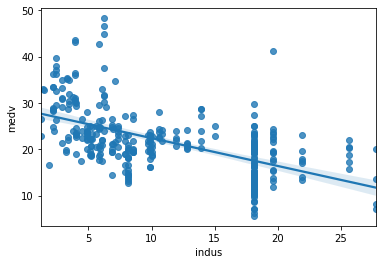

In [19]:
sns.regplot(x='indus', y='medv', data=boston)

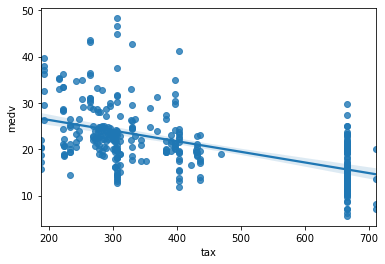

In [20]:
sns.regplot(x='tax', y='medv', data=boston)

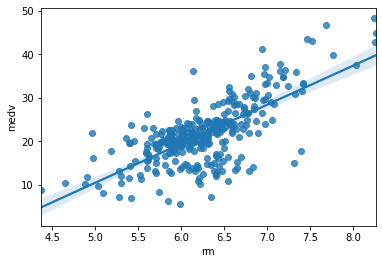

In [21]:
sns.regplot(x='rm', y='medv', data=boston)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
#lstat (proportion of population with lower status) and rm (average number of rooms per dwelling) seems to have their values more concentrated and closer to the line. However, lstat has a trend to decrease and rm has a trend to increase when in relation to medv, which is the median value of owner-occupied homes in $1000's.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

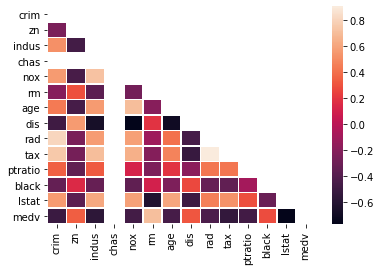

In [22]:
# Your response here
import seaborn as sns
import numpy as np
corr_matrix=np.triu(boston.corr())
sns.heatmap(boston.corr(),linewidths=.5,mask=corr_matrix)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [24]:
boston['medv'].describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [23]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
from sklearn.model_selection import train_test_split
X = boston.drop(columns='medv')
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [26]:
# Five separate RFR here with the given max depths
from sklearn.tree import DecisionTreeRegressor

max_depths = [2,4,6,8,10]
models =[]

for d in max_depths: 
    tree = DecisionTreeRegressor(max_depth=d, random_state=1) 
    tree.fit(X_train, y_train)
    
    models.append(tree)

In [32]:
tree.score(X_train,y_train) #train model with a score of 94%... very good!

0.949027958903232

Now, plot the score for each tree on the training set and on the testing set.

[2, 4, 6, 8, 10]
[0.6166234086163938, 0.6992860004115735, 0.673963519668823, 0.6587126815977511, 0.6927972353003247]


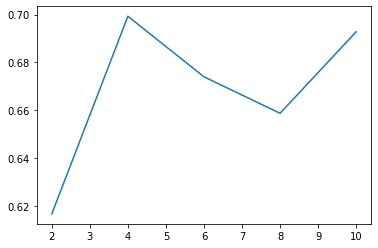

In [27]:
# Produce a plot with the score for the testing and training for the different max depths
r2_scores = []
for m in models:
    y_predict = m.predict(X_test)
    r2_scores.append(performance_metric(y_test, y_predict))
print(max_depths)
print(r2_scores)

sns.lineplot(x=max_depths, y=r2_scores)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
#it seems to be a high variance between the depth of the trees and the performance of the model. The values are higher with a maximum depth of 4 and after that with a maximum depth of 10

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
#I think that the model suffer from a high variance and a lower bias, when trained with a maximum depth of 10. It is overfitting.
#When the model is trained with a maximum depth of 1, it suffers from a high bias and a low variance. It is underfitting.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [29]:
max_depths = [3,4,5,6]
models =[]

for d in max_depths: 
    tree = DecisionTreeRegressor(max_depth=d, random_state=1) 
    tree.fit(X_train, y_train)
   
    models.append(tree)

In [31]:
 tree.score(X_test,y_test) #however, our test model has only 67% of score, which is not really good...

0.673963519668823

[3, 4, 5, 6]
[0.6756240667213511, 0.6992860004115735, 0.6869451939930626, 0.673963519668823]


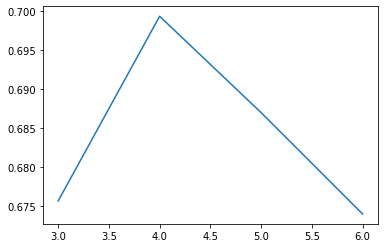

In [30]:
r2_scores = []
for m in models:
    y_predict = m.predict(X_test)
    r2_scores.append(performance_metric(y_test, y_predict))
print(max_depths)
print(r2_scores)

sns.lineplot(x=max_depths, y=r2_scores)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
#Data collected from 1978 could be interesting if we have more recent data after that. If not... It could be a mistake believe in our results for nowadays based only in data from 1978. We are in 2020... so...
# I don't think that this model is robust enough to make consistent predictions... It presents a high variance... so...
#I don't believe that data collected from a city like Boston could be applicable in a rural city. 